In [1]:
from abel import HALHFv1, HALHFv2
%load_ext autoreload
%autoreload 2

## HALHF version 1.0 (original paper)

In [2]:
halhf1 = HALHFv1()
halhf1.run('preset_example1', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε = 165.1/0.6 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  222.9 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.1/0.6 mm-mrad
    ... #2  StageBasic #1           (s =  227.8 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.2/0.6 mm-mrad
    ... #3  InterstageBasic         (s =  236.3 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.2/0.6 mm-mrad
    ... #4  StageBasic #2           (s =  241.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.3/0.6 mm-mrad
    ... #5  InterstageBasic         (s =  253.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.3/0.6 mm-mrad
    ... #6  StageBasic #3           (s =  258.0 m) :   E =  98.7 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 165.3/0.6 mm-mrad
    ... #7  InterstageBasic         (s =  272.7 m) :   E 

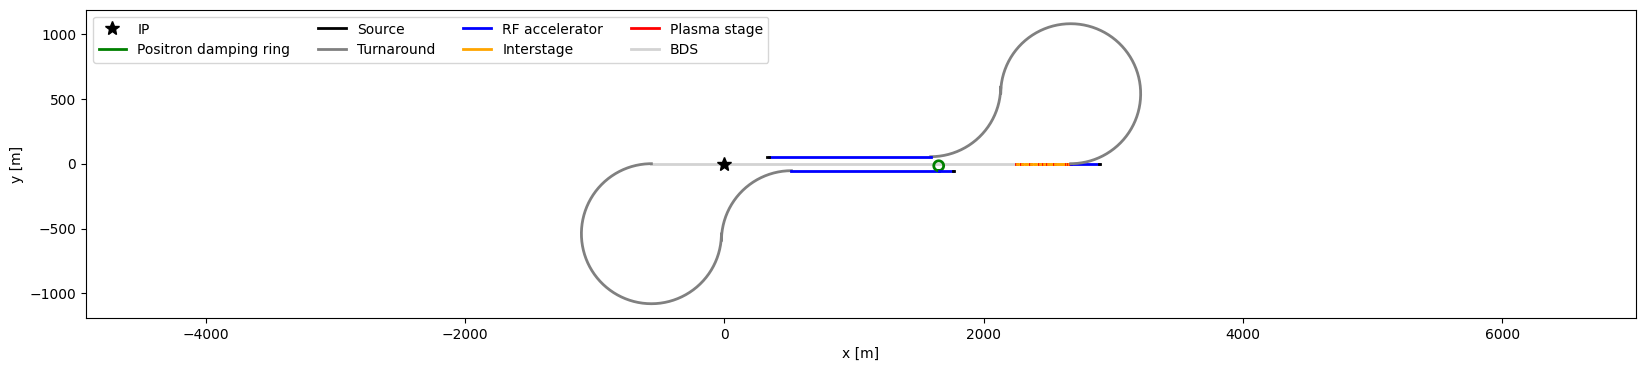

In [3]:
halhf1.plot_survey()

In [4]:
halhf1.print_cost()

-- COSTS -----------------------------------------
-- Construction: 3653 MILCU
   -- Electron arm (plasma): 2539 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 64 MILCU
         -- Instrumented beamline (29%): 3 MILCU
         -- RF structures (31x): 25 MILCU
         -- Klystrons (7x, 50 MW peak, 199 kW avg): 36 MILCU
      -- Driver complex: 2059 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 1613 MILCU
            -- Instrumented beamline (29%): 15 MILCU
            -- RF structures (1766x): 143 MILCU
            -- Klystrons (539x, 50 MW peak, 96 kW avg): 1455 MILCU
         -- Turnaround: 94 MILCU
         -- Civil construction: 302 MILCU
      -- Plasma stages (16x): 23 MILCU
      -- Interstages: 33 MILCU
      -- BDS: 91 MILCU
      -- Civil construction: 174 MILCU
   -- Positron arm (RF): 930 MILCU
      -- Source: 50 MILCU
      -- RF injector: 38 MILCU
         -- Instrumented beamline (29%): 1 MILCU
         -- RF structures (16x): 

## HALHF version 2.0 (baseline update)

In [100]:
halhf2 = HALHFv2()
halhf2.run('preset_example2', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε =  89.5/0.3 mm-mrad
    ... #1  RFAcceleratorCLICopti   (s =  440.9 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  89.5/0.3 mm-mrad
    ... #2  StageBasic #1           (s =  455.9 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  89.9/0.3 mm-mrad
    ... #3  InterstageBasic         (s =  463.0 m) :   E =  20.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  89.9/0.3 mm-mrad
    ... #4  StageBasic #2           (s =  478.0 m) :   E =  35.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  90.1/0.3 mm-mrad
    ... #5  InterstageBasic         (s =  487.9 m) :   E =  35.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  90.1/0.3 mm-mrad
    ... #6  StageBasic #3           (s =  502.9 m) :   E =  50.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.0%, ε =  90.3/0.3 mm-mrad
    ... #7  InterstageBasic         (s =  515.1 m) :   E 

-- COSTS -----------------------------------------
-- Construction: 3626 MILCU
   -- PlasmaLinac: 1593 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 153 MILCU
         -- Instrumented beamline (25%): 4 MILCU
         -- RF structures (141x): 38 MILCU
         -- Klystrons (141x, 19 MW peak, 24 kW avg): 111 MILCU
      -- Driver complex: 950 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 771 MILCU
            -- Instrumented beamline (25%): 20 MILCU
            -- RF structures (736x): 169 MILCU
            -- Klystrons (736x, 31 MW peak, 39 kW avg): 582 MILCU
         -- Turnaround: 3 MILCU
         -- Civil construction: 126 MILCU
      -- Plasma stages (25x): 61 MILCU
      -- Interstages: 54 MILCU
      -- BDS: 79 MILCU
      -- Civil construction: 200 MILCU
   -- ConventionalLinac: 1849 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 91 MILCU
         -- Instrumented beamline (25%): 3 MILCU
         -- RF structur

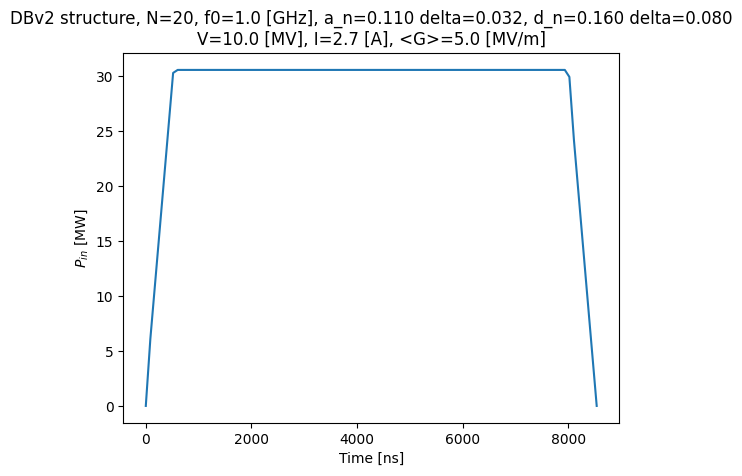

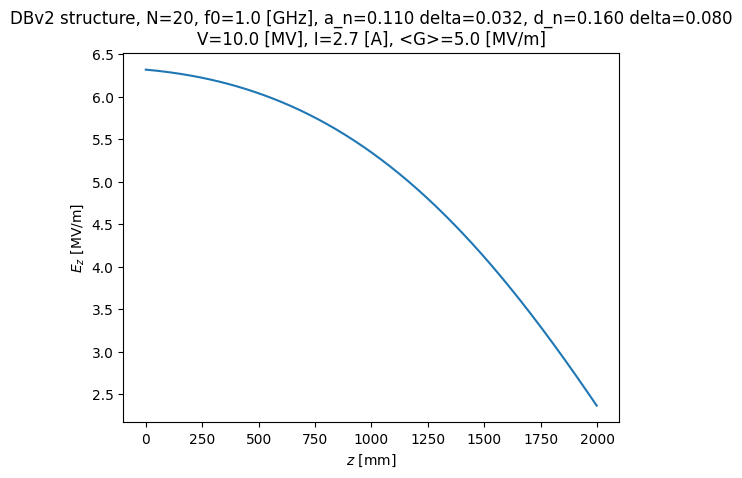

In [101]:
halhf2.linac1.driver_complex.rf_accelerator.plot_power_profile()
halhf2.linac1.driver_complex.rf_accelerator.plot_gradient_profile()
halhf2.print_cost()
halhf2.print_power()

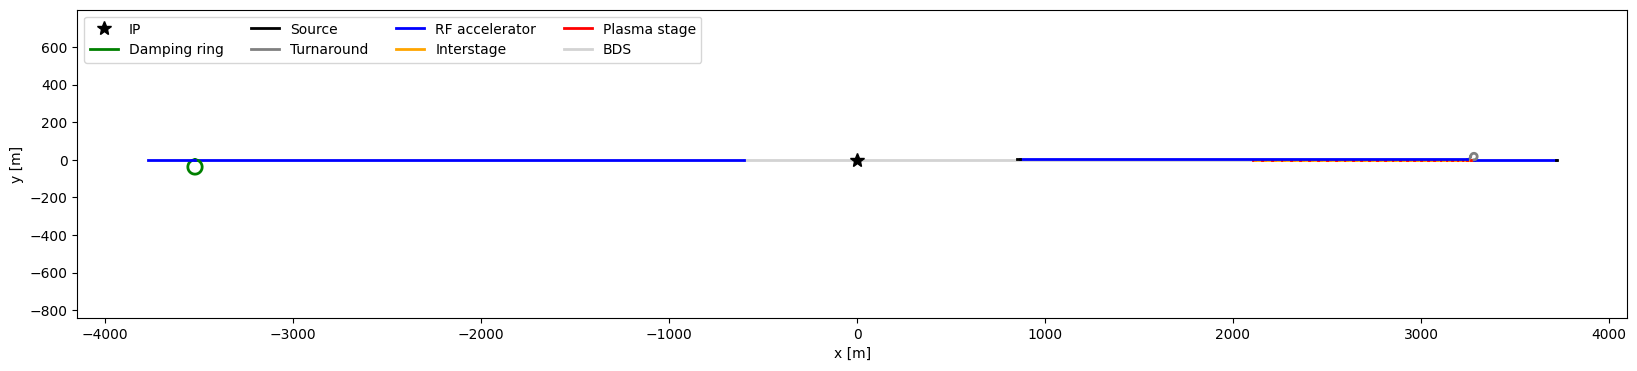

In [57]:
halhf2.plot_survey()